In [3]:
%pip install ultralytics opencv-python pillow deep_sort_realtime 


Note: you may need to restart the kernel to use updated packages.


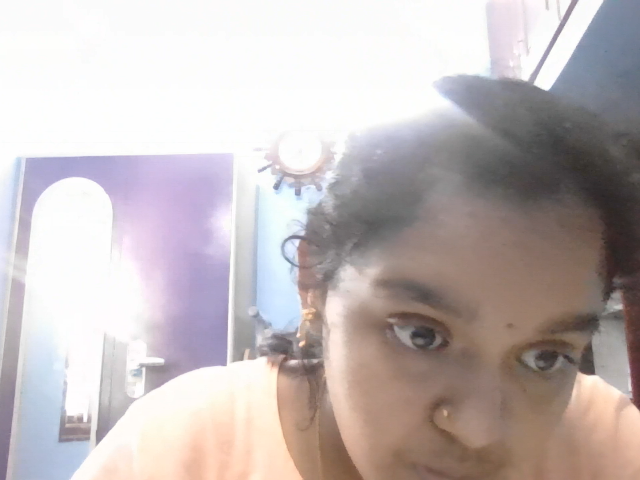


0: 480x640 1 person, 299.5ms
Speed: 5.7ms preprocess, 299.5ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
# Install required packages
!pip install -q ultralytics opencv-python pillow deep_sort_realtime

# Import necessary libraries
import cv2
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
from IPython.display import display, clear_output
from PIL import Image

# Load YOLOv8 model and initialize DeepSORT tracker
model = YOLO('yolov8n.pt')
tracker = DeepSort(max_age=30)

# Real-time detection and tracking function
def detect_and_track():
    cap = cv2.VideoCapture(0)  # Access the webcam

    if not cap.isOpened():
        print("❌ Could not open webcam.")
        return

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.resize(frame, (640, 480))
            results = model(frame)[0]

            detections = []
            for result in results.boxes:
                x1, y1, x2, y2 = map(int, result.xyxy[0].tolist())
                conf = float(result.conf[0])
                cls = int(result.cls[0])
                detections.append(([x1, y1, x2 - x1, y2 - y1], conf, cls))

            tracks = tracker.update_tracks(detections, frame=frame)

            for track in tracks:
                if not track.is_confirmed():
                    continue
                track_id = track.track_id
                x1, y1, x2, y2 = map(int, track.to_ltrb())
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f'ID: {track_id}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(rgb_frame)

            clear_output(wait=True)
            display(img)

    except KeyboardInterrupt:
        print("🛑 Stopped manually.")

    finally:
        cap.release()
        cv2.destroyAllWindows()
        print("📷 Webcam released.")

# Run the detection and tracking
detect_and_track()
